In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [4]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [5]:
# mat1=scipy.io.loadmat('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_prep.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# print('raw_Test_data',nina_raw_test)

In [6]:
# # files.upload()
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Train.csv", nina_raw_train, delimiter=",")

In [7]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Test.csv", nina_raw_test, delimiter=",")

In [8]:
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program

LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000
n_features = 12

In [10]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [11]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [12]:
# Load data set containing all the data from csv
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 20800000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,15.0,9.0,16.0,13.0,27.0,64.0,33.0,16.0,1.0,3.0,34.0,114.0,1.0
1,22.0,10.0,15.0,11.0,29.0,34.0,27.0,15.0,1.0,4.0,13.0,121.0,1.0
2,29.0,10.0,15.0,9.0,29.0,5.0,21.0,15.0,1.0,3.0,10.0,127.0,1.0
3,44.0,0.0,14.0,6.0,29.0,7.0,14.0,20.0,1.0,3.0,28.0,127.0,1.0
4,52.0,11.0,15.0,4.0,29.0,13.0,8.0,28.0,2.0,4.0,40.0,127.0,1.0
5,31.0,6.0,15.0,3.0,25.0,19.0,2.0,36.0,2.0,3.0,44.0,127.0,1.0
6,2.0,5.0,15.0,1.0,22.0,18.0,2.0,38.0,2.0,3.0,41.0,127.0,1.0
7,0.0,6.0,15.0,0.0,26.0,20.0,3.0,25.0,1.0,3.0,32.0,121.0,1.0
8,12.0,3.0,14.0,0.0,31.0,20.0,3.0,4.0,1.0,3.0,18.0,105.0,1.0
9,17.0,5.0,12.0,0.0,24.0,16.0,1.0,18.0,1.0,4.0,1.0,101.0,1.0


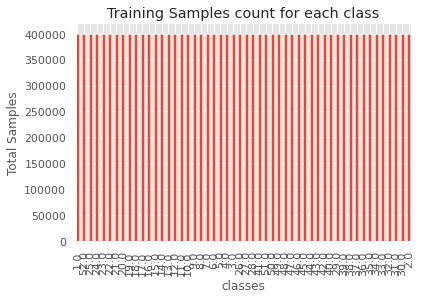

In [13]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [14]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/nina_DB4_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 10400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,107.0,14.0,13.0,7.0,100.0,20.0,5.0,72.0,60.0,105.0,22.0,91.0,1.0
1,105.0,16.0,11.0,8.0,76.0,10.0,16.0,73.0,59.0,107.0,20.0,42.0,1.0
2,101.0,18.0,10.0,8.0,49.0,38.0,40.0,75.0,55.0,108.0,16.0,23.0,1.0
3,92.0,18.0,8.0,6.0,55.0,46.0,79.0,35.0,48.0,110.0,10.0,63.0,1.0
4,80.0,18.0,7.0,3.0,77.0,27.0,99.0,2.0,38.0,109.0,2.0,83.0,1.0
5,69.0,20.0,8.0,1.0,93.0,25.0,46.0,37.0,27.0,109.0,5.0,94.0,1.0
6,51.0,21.0,7.0,2.0,100.0,84.0,28.0,93.0,21.0,106.0,7.0,98.0,1.0
7,9.0,17.0,6.0,1.0,103.0,112.0,45.0,74.0,28.0,91.0,3.0,100.0,1.0
8,38.0,10.0,4.0,6.0,99.0,118.0,30.0,17.0,43.0,72.0,19.0,98.0,1.0
9,64.0,1.0,3.0,11.0,80.0,118.0,30.0,25.0,57.0,64.0,36.0,86.0,1.0


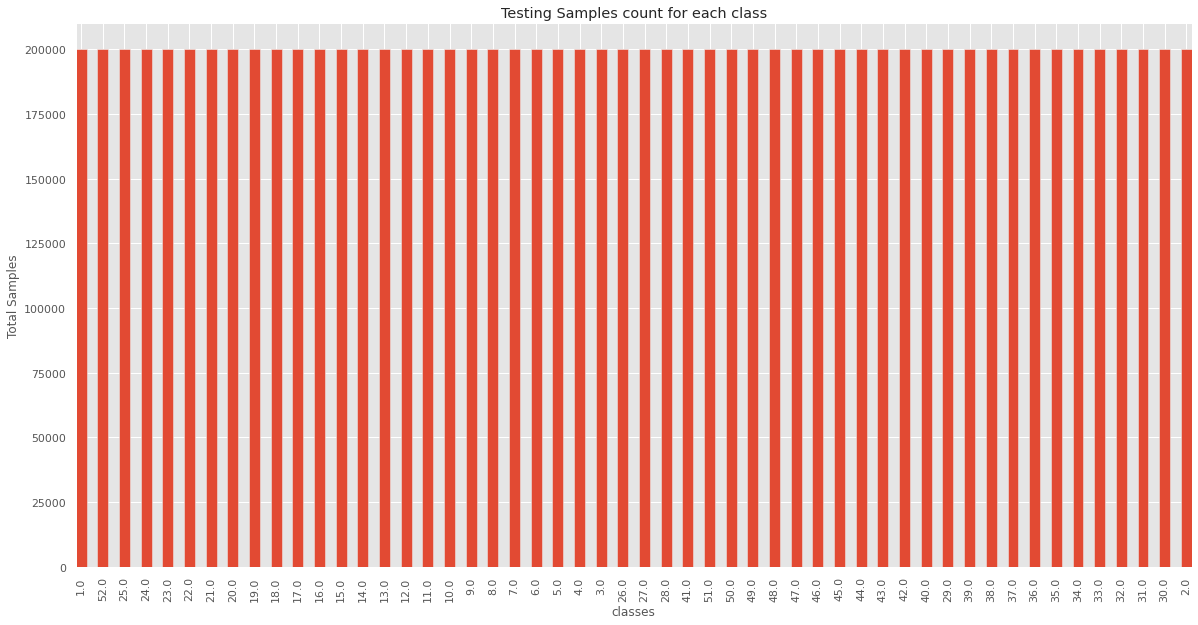

In [15]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# Better understand how the recordings are spread across the different
# users who participated in the study
#df['user-id'].value_counts().plot(kind='bar',
#                                  title='Training Examples by User')

In [16]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
print('df_test_size',df_Test)

df_train_size            C1    C2    C3    C4    C5   C6    C7    C8   C9   C10   C11   C12  \
0        15.0   9.0  16.0  13.0  27.0 64.0  33.0  16.0  1.0   3.0  34.0 114.0   
1        22.0  10.0  15.0  11.0  29.0 34.0  27.0  15.0  1.0   4.0  13.0 121.0   
2        29.0  10.0  15.0   9.0  29.0  5.0  21.0  15.0  1.0   3.0  10.0 127.0   
3        44.0   0.0  14.0   6.0  29.0  7.0  14.0  20.0  1.0   3.0  28.0 127.0   
4        52.0  11.0  15.0   4.0  29.0 13.0   8.0  28.0  2.0   4.0  40.0 127.0   
...       ...   ...   ...   ...   ...  ...   ...   ...  ...   ...   ...   ...   
20799995 71.0  93.0 120.0 106.0  19.0 23.0 103.0 110.0 16.0 125.0 127.0  79.0   
20799996 85.0  88.0 127.0  78.0  30.0  4.0  78.0  93.0  3.0 127.0 125.0  85.0   
20799997 71.0  98.0 122.0  11.0  75.0 13.0  49.0  75.0 19.0 121.0 116.0  90.0   
20799998 45.0 110.0 112.0  58.0 108.0 23.0  28.0  60.0 30.0 108.0 103.0  94.0   
20799999 15.0 107.0 112.0  92.0 119.0 23.0  27.0  47.0 34.0 110.0  47.0  95.0   

          Cla

In [17]:
# df_Train.iloc[0:4,0:n_features]
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [18]:
scaler.mean_

array([68.22595389, 68.83210808, 59.23731437, 46.06804413, 48.61008168,
       47.55850087, 49.35977822, 58.90745986, 49.90539394, 69.65146466,
       49.44595365, 47.62155269])

In [19]:
scaler.scale_

array([38.92524625, 40.75804346, 40.09794915, 36.28583231, 39.06444045,
       39.22316172, 38.65921409, 38.66027133, 39.47218141, 40.52885441,
       42.23179594, 36.91950085])

In [20]:
result=df_Train.iloc[0:2,0:n_features].values
print(result)

[[ 15.   9.  16.  13.  27.  64.  33.  16.   1.   3.  34. 114.]
 [ 22.  10.  15.  11.  29.  34.  27.  15.   1.   4.  13. 121.]]


In [21]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [22]:
result=df_Train.iloc[1:3,0:n_features].values
print(result)

[[-1.18755713 -1.4434478  -1.10323135 -0.96643902 -0.50199315 -0.34567588
  -0.5783816  -1.1357256  -1.23898382 -1.61986974 -0.86299796  1.98752544]
 [-1.00772526 -1.4434478  -1.10323135 -1.02155695 -0.50199315 -1.08503494
  -0.73358393 -1.1357256  -1.23898382 -1.64454351 -0.93403448  2.15004118]]


In [23]:
result=df_Test.iloc[0:2,0:n_features].values
print(result)

[[107.  14.  13.   7. 100.  20.   5.  72.  60. 105.  22.  91.]
 [105.  16.  11.   8.  76.  10.  16.  73.  59. 107.  20.  42.]]


In [24]:
df_Test.iloc[:,0:12]=scaler.transform(df_Test.iloc[:,0:12])

In [25]:
result=df_Test.iloc[1:3,0:n_features].values
print(result)

[[ 0.94473509 -1.29623759 -1.20298707 -1.04911591  0.70114708 -0.95755924
  -0.8629192   0.36452254  0.23040546  0.92152951 -0.69724607 -0.15226513]
 [ 0.84197402 -1.24716752 -1.227926   -1.04911591  0.00998141 -0.24369532
  -0.24210989  0.41625523  0.12906827  0.94620329 -0.79196143 -0.66689831]]


In [26]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 12
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        c11s = df['C11'].values[i: i + time_steps]
        c12s = df['C12'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s,c11s,c12s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [27]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (2079, 10000, 12)
2079 training samples
y_train shape:  (2079,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (2079, 52)


In [28]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)
# score = model_m.evaluate(x_test, y_test_hot, verbose=1)
# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

x_test shape:  (1039, 10000, 12)
1039 testing samples
y_test shape:  (1039,)


In [29]:
# n_steps, n_length = 9, 57
# n_steps, n_length = 3, 171
n_steps, n_length = 100, 100
n_depth = 12
# n_steps, n_length = 19, 27
x_train = x_train.reshape((x_train.shape[0], n_steps, n_length, n_features))
print('x_train shape: ', x_train.shape)
x_test = x_test.reshape((x_test.shape[0], n_steps, n_length, n_features))
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (2079, 100, 100, 12)
x_test shape:  (1039, 100, 100, 12)
n_outputs 52


In [30]:
verbose, epochs, batch_size = 0, 500, 16

In [31]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [32]:
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 100, 50, 64)       6976      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 22, 64)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 100, 22, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 100, 11, 64)       20544     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 100, 11, 64)       0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 100, 11, 64)       0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 100, 6, 64)        2

In [33]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/CNN_nina_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot),verbose=1)

Epoch 1/500
130/130 [==============================] - ETA: 0s - loss: 4.6423 - accuracy: 0.0693
Epoch 00001: val_accuracy improved from -inf to 0.23099, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/checkpoint.hdf5
130/130 [==============================] - 37s 283ms/step - loss: 4.6423 - accuracy: 0.0693 - val_loss: 3.1965 - val_accuracy: 0.2310
Epoch 2/500
130/130 [==============================] - ETA: 0s - loss: 3.4863 - accuracy: 0.2030
Epoch 00002: val_accuracy improved from 0.23099 to 0.42733, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/checkpoint.hdf5
130/130 [==============================] - 3s 23ms/step - loss: 3.4863 - accuracy: 0.2030 - val_loss: 2.5118 - val_accuracy: 0.4273
Epoch 3/500
128/130 [============================>.] - ETA: 0s - loss: 2.8237 - accuracy: 0.3374
Epoch 00003: val_accuracy improved from 0.42733 to 0.53032, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CN

Epoch 25/500
128/130 [============================>.] - ETA: 0s - loss: 0.5104 - accuracy: 0.9912
Epoch 00025: val_accuracy did not improve from 0.77671
130/130 [==============================] - 3s 22ms/step - loss: 0.5105 - accuracy: 0.9913 - val_loss: 1.2752 - val_accuracy: 0.7642
Epoch 26/500
129/130 [============================>.] - ETA: 0s - loss: 0.5085 - accuracy: 0.9913
Epoch 00026: val_accuracy did not improve from 0.77671
130/130 [==============================] - 3s 20ms/step - loss: 0.5082 - accuracy: 0.9913 - val_loss: 1.2634 - val_accuracy: 0.7671
Epoch 27/500
130/130 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.9904
Epoch 00027: val_accuracy did not improve from 0.77671
130/130 [==============================] - 3s 20ms/step - loss: 0.5062 - accuracy: 0.9904 - val_loss: 1.2531 - val_accuracy: 0.7709
Epoch 28/500
130/130 [==============================] - ETA: 0s - loss: 0.4940 - accuracy: 0.9947
Epoch 00028: val_accuracy did not improve from 

128/130 [============================>.] - ETA: 0s - loss: 0.4318 - accuracy: 0.9956
Epoch 00053: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 24ms/step - loss: 0.4317 - accuracy: 0.9957 - val_loss: 1.3363 - val_accuracy: 0.7449
Epoch 54/500
129/130 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.9981
Epoch 00054: val_accuracy did not improve from 0.77863
130/130 [==============================] - 4s 27ms/step - loss: 0.4259 - accuracy: 0.9981 - val_loss: 1.3570 - val_accuracy: 0.7411
Epoch 55/500
130/130 [==============================] - ETA: 0s - loss: 0.4216 - accuracy: 0.9990
Epoch 00055: val_accuracy did not improve from 0.77863
130/130 [==============================] - 4s 29ms/step - loss: 0.4216 - accuracy: 0.9990 - val_loss: 1.3223 - val_accuracy: 0.7488
Epoch 56/500
129/130 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.9981
Epoch 00056: val_accuracy did not improve from 0.77863
130/1

Epoch 82/500
129/130 [============================>.] - ETA: 0s - loss: 0.3781 - accuracy: 0.9985
Epoch 00082: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 24ms/step - loss: 0.3780 - accuracy: 0.9986 - val_loss: 1.4114 - val_accuracy: 0.7401
Epoch 83/500
128/130 [============================>.] - ETA: 0s - loss: 0.3784 - accuracy: 0.9971
Epoch 00083: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 24ms/step - loss: 0.3783 - accuracy: 0.9971 - val_loss: 1.4085 - val_accuracy: 0.7372
Epoch 84/500
129/130 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.9971
Epoch 00084: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 23ms/step - loss: 0.3805 - accuracy: 0.9971 - val_loss: 1.5194 - val_accuracy: 0.7190
Epoch 85/500
130/130 [==============================] - ETA: 0s - loss: 0.3766 - accuracy: 0.9966
Epoch 00085: val_accuracy did not improve from 

Epoch 111/500
127/130 [============================>.] - ETA: 0s - loss: 0.3369 - accuracy: 0.9966
Epoch 00111: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 21ms/step - loss: 0.3366 - accuracy: 0.9966 - val_loss: 1.5832 - val_accuracy: 0.6949
Epoch 112/500
126/130 [============================>.] - ETA: 0s - loss: 0.3362 - accuracy: 0.9975
Epoch 00112: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 21ms/step - loss: 0.3360 - accuracy: 0.9976 - val_loss: 1.5434 - val_accuracy: 0.7190
Epoch 113/500
127/130 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.9970
Epoch 00113: val_accuracy did not improve from 0.77863
130/130 [==============================] - 3s 24ms/step - loss: 0.3347 - accuracy: 0.9971 - val_loss: 1.5227 - val_accuracy: 0.6987
Epoch 114/500
127/130 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.9966
Epoch 00114: val_accuracy did not improve f

In [34]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 41
train accuracy and validation accuracy 0.9956709742546082 0.7786332964897156


In [35]:
model.save('/media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/CNN_nina_100X100')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/preprocess/CNN100X100/CNN_nina_100X100/assets


history loss
history accuracy
history val_loss
history val_accuracy


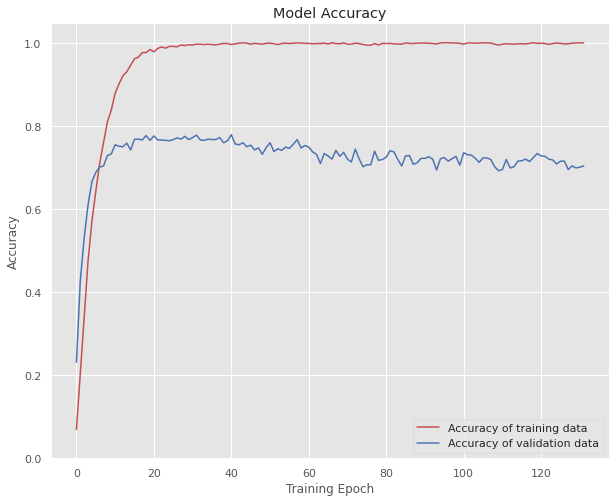

In [36]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


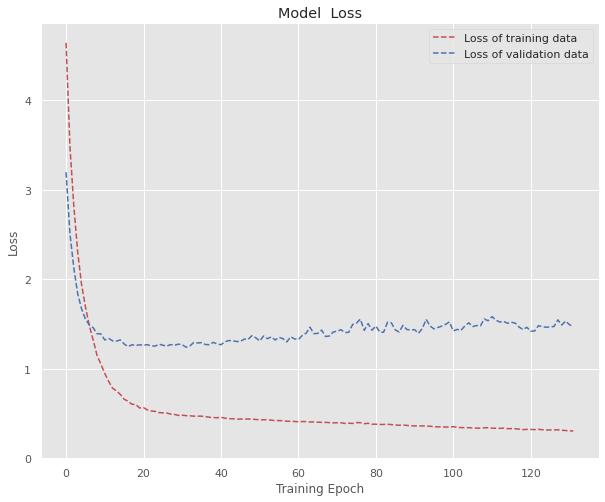

In [37]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [38]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

65/65 [==============================] - 1s 8ms/step - loss: 1.2686 - accuracy: 0.7786
test_accuracy 0.7786332964897156


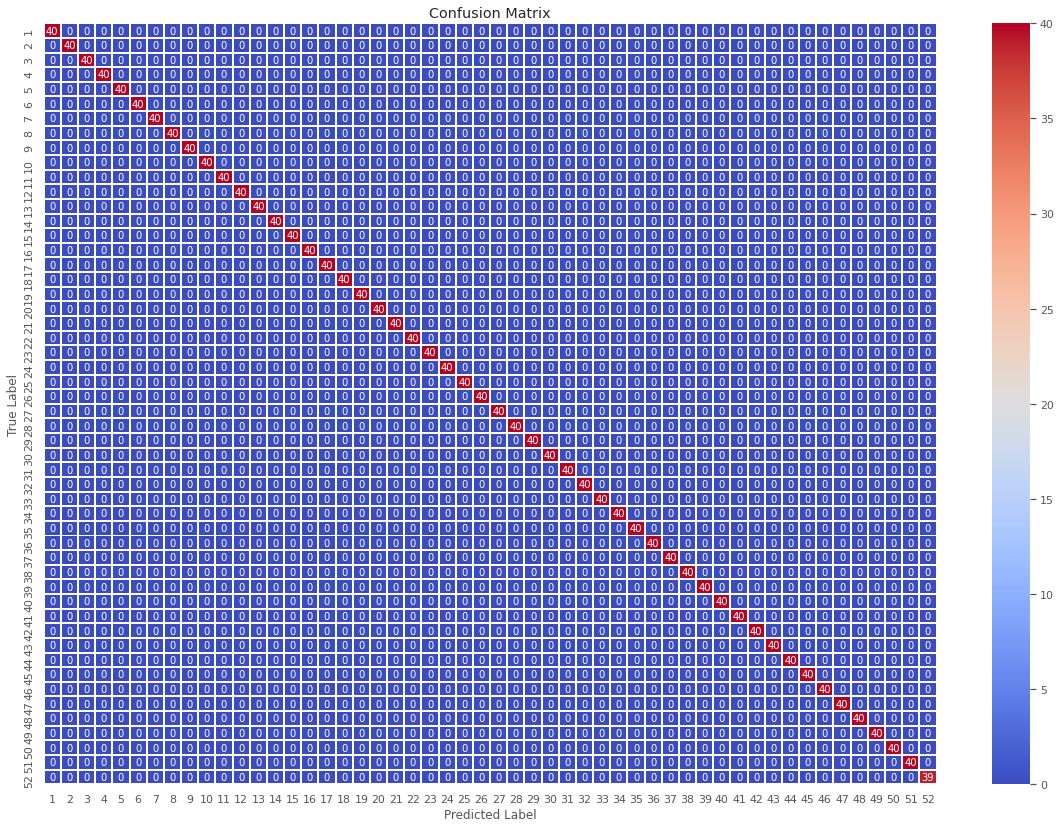

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        40
          17       1.00    

In [39]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

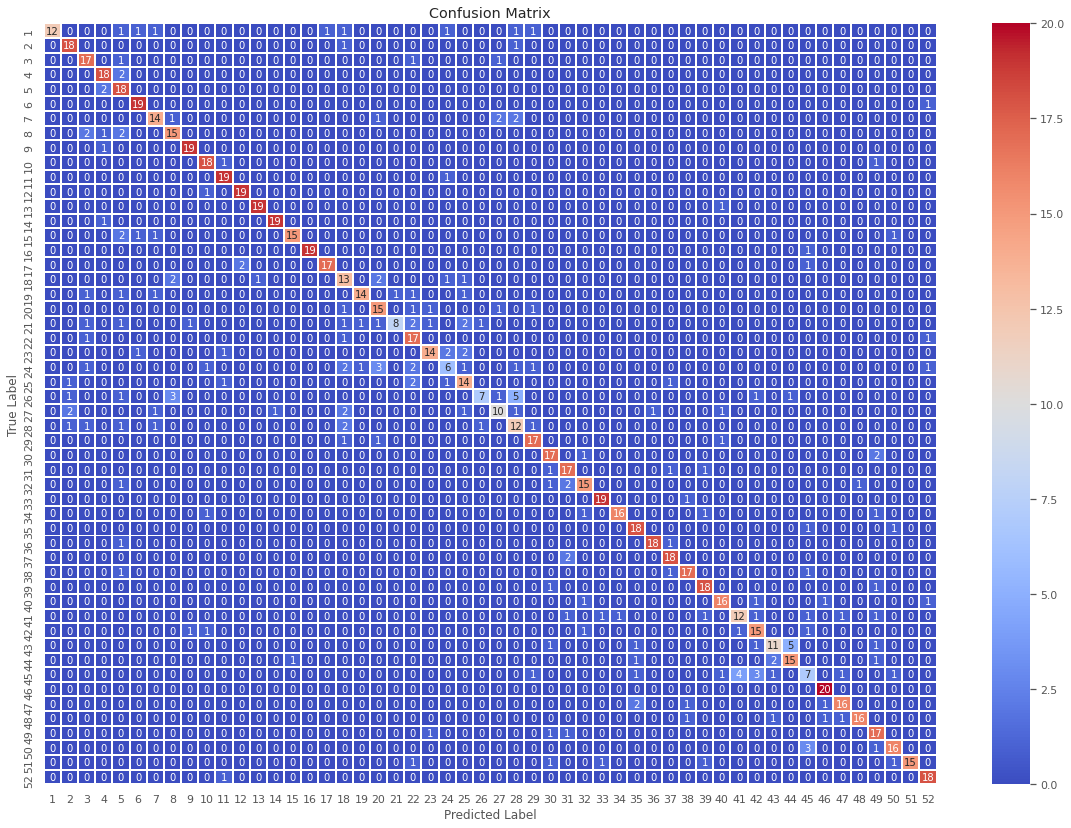

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.78      0.90      0.84        20
           2       0.71      0.85      0.77        20
           3       0.78      0.90      0.84        20
           4       0.55      0.90      0.68        20
           5       0.86      0.95      0.90        20
           6       0.74      0.70      0.72        20
           7       0.71      0.75      0.73        20
           8       0.90      0.95      0.93        20
           9       0.82      0.90      0.86        20
          10       0.83      0.95      0.88        20
          11       0.90      0.95      0.93        20
          12       0.95      0.95      0.95        20
          13       0.95      0.95      0.95        20
          14       0.94      0.75      0.83        20
          15       1.00      0.95      0.97        20
          16       0.94      0.85      0.89        20
          17       0.52    

In [40]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))